<a href="https://colab.research.google.com/github/mariaa234/Probleme-de-regresie/blob/main/laborator6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Probleme de regresie


In [ ]:
import csv
import os
import matplotlib.pyplot as plt
import numpy as np  
from sklearn import linear_model

##My Regression

In [ ]:
class MyRegression:

    def __init__(self):
        self.intercept = 0.0
        self.coef1 = 0.0
        self.coef2 = 0.0

    '''
        Determinarea coeficientilor 
        Determinarea modelului liniar f care transformă orice x în y
        Valorile coeficientilor determinate pe baza formulei (XT * X)^-1 * XT * Y , unde X = [1 xij] i = 1,n ; j = 1,m 
                                                                                         Y = [yi] i = 1,n 
                                                                                         XT - transpusa lui X 
    '''
    def fit(self, inputs, outputs):

        matrice = []
        for i in range(0, len(inputs)):
            lista = [1] + inputs[i]
            matrice.append(lista)

        transpusa = np.transpose(matrice)
        produs = np.dot(transpusa, matrice)
        inversa = np.linalg.inv(produs)
        coeficienti = np.dot(inversa, transpusa)
        coeficienti = np.dot(coeficienti, outputs)

        self.intercept, self.coef1, self.coef2 = coeficienti[0], coeficienti[1], coeficienti[2]
        return coeficienti[0], coeficienti[1], coeficienti[2]
    '''
        Predictia unor outputuri pe baza modelului invatat 
        f(x) = coef0 + coef1 * x1 + coef2 * x2
    '''
    def predict(self, x):
        
      return [self.intercept + self.coef1 * val[0]+self.coef2 * val[1] for val in x]
       

##Pasul 1

In [ ]:

def loadData(fileName, inputVariabName1,inputVariabName2, outputVariabName):
        data=[]
        dataNames = []
        with open(fileName) as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=',')
            line_count = 0
            for row in csv_reader:
                if line_count == 0:
                    dataNames = row
                else:
                    data.append(row)
                line_count += 1

        selectedVariable = dataNames.index(inputVariabName1)
        inputs1 = [float(data[i][selectedVariable]) if data[i][selectedVariable]!='' else 0.0 for i in range(len(data))]

        selectedVariable2 = dataNames.index(inputVariabName2)
        inputs2 = [float(data[i][selectedVariable2])if data[i][selectedVariable2]!='' else 0.0 for i in range(len(data))]

        selectedOutput = dataNames.index(outputVariabName)
        outputs = [float(data[i][selectedOutput])if data[i][selectedOutput]!='' else 0.0 for i in range(len(data))]

        inputs = [inputs1,inputs2]
        
        return inputs, outputs


inputs, outputs = loadData("/v1_world-happiness-report-2017.csv", 'Economy..GDP.per.Capita.', 'Freedom', 'Happiness.Score')
print('in:  ', inputs)
print('out: ', outputs)

in:   [[1.61646318435669, 1.48238301277161, 1.480633020401, 1.56497955322266, 1.44357192516327, 1.50394463539124, 1.47920441627502, 1.40570604801178, 1.49438726902008, 1.484414935112, 1.37538242340088, 1.10970628261566, 1.48709726333618, 1.54625928401947, 1.53570663928986, 1.48792338371277, 1.46378076076508, 1.74194359779358, 1.44163393974304, 1.25278460979462, 1.62634336948395, 1.10735321044922, 1.35268235206604, 1.18529546260834, 1.15318381786346, 1.69227766990662, 1.34327983856201, 1.21755969524384, 0.872001945972443, 1.23374843597412, 1.43092346191406, 1.12786877155304, 1.43362653255463, 1.38439786434174, 1.87076568603516, 1.07062232494354, 1.53062355518341, 1.36135590076447, 1.63295245170593, 1.32539355754852, 1.48841226100922, 1.29121541976929, 0.737299203872681, 1.00082039833069, 0.909784495830536, 1.29178786277771, 0.786441087722778, 1.39506661891937, 1.28177809715271, 0.907975316047668, 1.41691517829895, 1.31458234786987, 1.09186446666718, 1.26074862480164, 1.40167844295502, 0

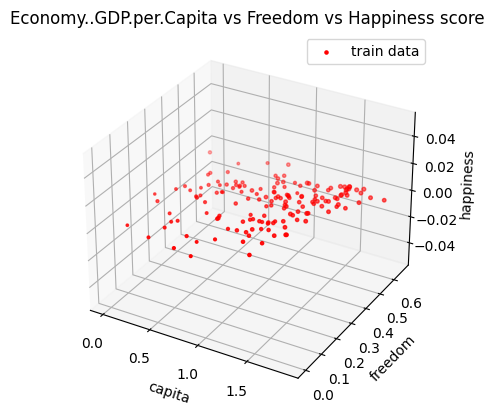

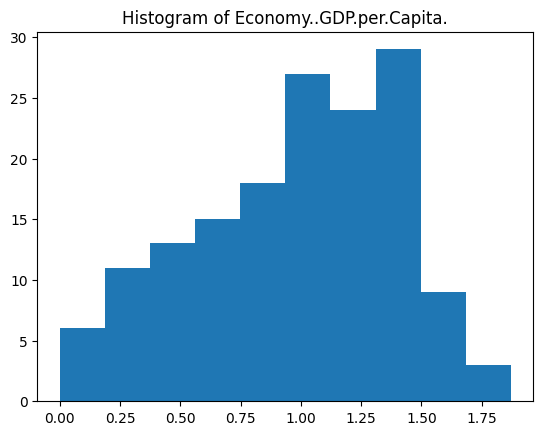

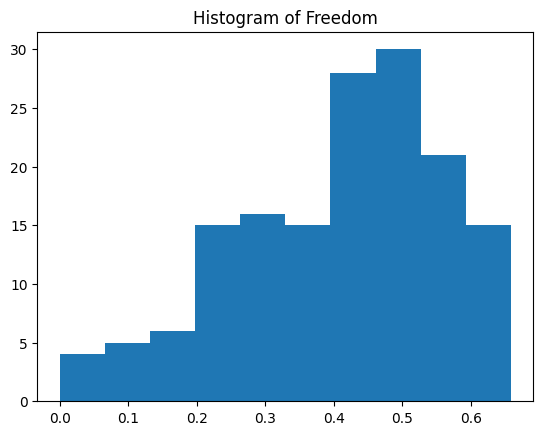

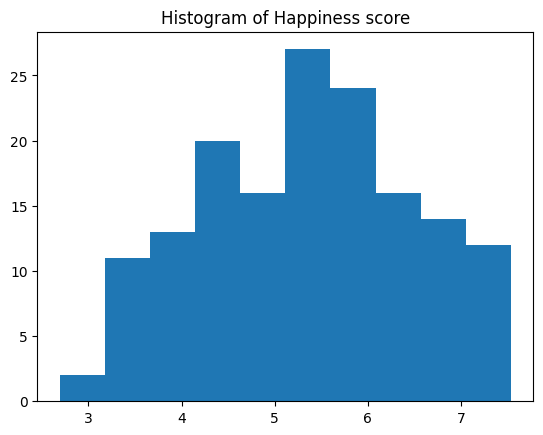

In [ ]:
def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()
def plotDataHistograInput(x, variableName1,variableName2):

    plotDataHistogram(x[0], variableName1)
    plotDataHistogram(x[1], variableName2)
def plot3Ddata(x1Train, x2Train, yTrain, x1Model = None, x2Model = None, yModel = None, x1Test = None, x2Test = None, yTest = None, title = None):
    from mpl_toolkits import mplot3d
    ax = plt.axes(projection = '3d')
    if (x1Train):
        plt.scatter(x1Train, x2Train, yTrain, c = 'r', marker = 'o', label = 'train data') 
    if (x1Model):
        plt.scatter(x1Model, x2Model, yModel, c = 'b', marker = 'o', label = 'learnt model') 
    if (x1Test):
        plt.scatter(x1Test, x2Test, yTest, c = 'g', marker = 'o', label = 'test data')  
    plt.title(title)
    ax.set_xlabel("capita")
    ax.set_ylabel("freedom")
    ax.set_zlabel("happiness")
    plt.legend()
    plt.show()
plot3Ddata(inputs[0], inputs[1], outputs, [], [], [], [], [], [], 'Economy..GDP.per.Capita vs Freedom vs Happiness score')

plotDataHistograInput(inputs,'Economy..GDP.per.Capita.', 'Freedom')
plotDataHistogram(outputs, 'Happiness score')

##Pasul 2

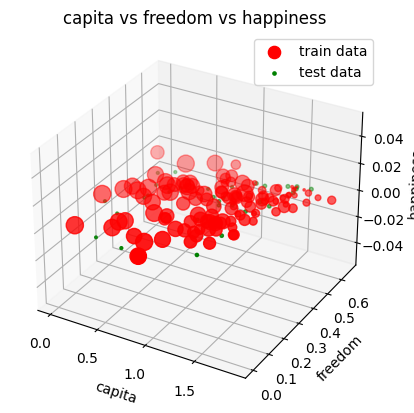

In [ ]:
np.random.seed(5)
indexes = [i for i in range(len(inputs[0]))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs[0])), replace = False)
validationSample = [i for i in indexes  if not i in trainSample]

trainInputs1 = [inputs[0][i] for i in trainSample]
trainInputs2 = [inputs[1][i] for i in trainSample]

trainOutputs = [outputs[i] for i in trainSample]

validationInputs1 = [inputs[0][i] for i in validationSample]
validationInputs2 = [inputs[1][i] for i in validationSample]

validationOutputs = [outputs[i] for i in validationSample]

plot3Ddata(trainInputs1, trainInputs2, trainSample, [], [], [], validationInputs1,validationInputs2,validationOutputs, 'capita vs freedom vs happiness')

##Pasul 3




###tools

In [ ]:
xx = []

for i in range(len(trainInputs1)):
  xx.append([trainInputs1[i],trainInputs2[i]])
# model initialisation
regressor_t = linear_model.LinearRegression()
# training the model by using the training inputs and known training outputs
regressor_t.fit(xx, trainOutputs)
# save the model parameters
w0, w1,w2 = regressor_t.intercept_, regressor_t.coef_[0], regressor_t.coef_[1]


print("Model invatat: f(x) = ", w0, ' + ', w1, ' * x1 +', w2, ' * x2')

Model invatat: f(x) =  2.52836631719082  +  1.876338735881282  * x1 + 2.314748747503324  * x2



###without tools



In [ ]:
regressor = MyRegression()
# # training the model by using the training inputs and known training outputs
regressor.fit(xx, trainOutputs)
# # save the model parameters
w0, w1,w2 = regressor.intercept, regressor.coef1 ,regressor.coef2
print("Model invatat: f(x) = ", w0, ' + ', w1, ' * x1 +', w2, ' * x2')

Model invatat: f(x) =  2.528366317190829  +  1.8763387358812813  * x1 + 2.3147487475033155  * x2


##Pasul 4

###tools

In [ ]:
xxx = []

for i in range(len(validationInputs1)):
  xxx.append([validationInputs1[i],validationInputs2[i]])
computedValidationOutputs = regressor_t.predict(([x for x in xxx]))

print("Predictii",computedValidationOutputs)


Predictii [7.03224244 6.75825933 6.7052939  6.58734657 6.75110833 6.15406823
 6.30170949 5.9876491  5.88226619 5.23644916 5.53715583 5.61828098
 6.11585227 5.35638109 5.42251637 5.16947542 5.36815302 5.03839628
 3.95735386 4.58343615 5.54234379 4.08091366 4.40810986 4.11125215
 5.10274356 3.24737276 3.80055467 4.01222665 3.54010999 3.29030262
 4.39022352]


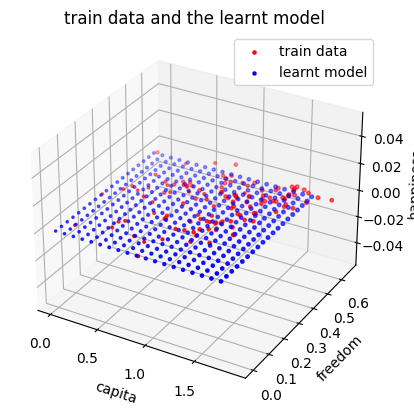

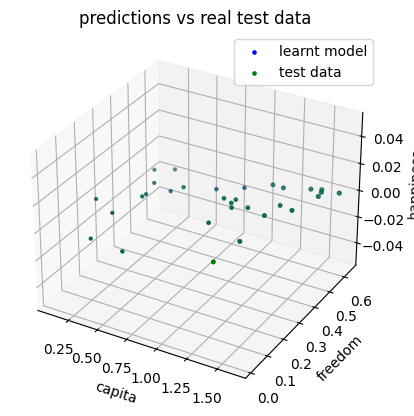

In [ ]:
noOfPoints = 20
xref1 = []
val = min(trainInputs1)
step1 = (max(trainInputs1) - min(trainInputs1)) / noOfPoints
for _ in range(1, noOfPoints):
    for _ in range(1, noOfPoints):
        xref1.append(val)
    val += step1

xref2 = []
val = min(trainInputs2)
step2 = (max(trainInputs2) - min(trainInputs2)) / noOfPoints
for _ in range(1, noOfPoints):
    aux = val
    for _ in range(1, noOfPoints):
        xref2.append(aux)
        aux += step2
yref = [w0 + w1 * el1 + w2 * el2 for el1, el2 in zip(xref1, xref2)]
plot3Ddata(trainInputs1, trainInputs2, trainOutputs, xref1, xref2, yref, [], [], [], 'train data and the learnt model')
plot3Ddata([], [], [], validationInputs1, validationInputs2, computedValidationOutputs, validationInputs1, validationInputs2, validationOutputs, 'predictions vs real test data')


###without tools

In [ ]:
computedValidationOutputs = regressor.predict([x for x in xxx])
print("Predictii",computedValidationOutputs)


Predictii [7.032242443432522, 6.758259331596753, 6.7052939038469725, 6.587346573689061, 6.751108326862993, 6.1540682317003865, 6.301709489802078, 5.987649099375413, 5.88226618998935, 5.236449159427399, 5.537155828819617, 5.618280982999432, 6.115852266959434, 5.356381091759255, 5.422516372244954, 5.169475420659458, 5.3681530208528425, 5.0383962826576685, 3.957353857841782, 4.583436149433916, 5.542343785330811, 4.080913662143927, 4.4081098566770285, 4.111252147968489, 5.102743563638462, 3.24737275624009, 3.800554670879278, 4.012226651353878, 3.540109989750113, 3.290302621066232, 4.390223523355552]


##Pasul 5

In [ ]:
error = 0.0
for t1, t2 in zip(computedValidationOutputs, validationOutputs):
    error += (t1 - t2) ** 2
error = error / len(validationOutputs)
print('Eroare de predictie (without tool):  ', error)

from sklearn.metrics import mean_squared_error

error = mean_squared_error(validationOutputs, computedValidationOutputs)
print('Eroare de predictie (tool):  ', error)

Eroare de predictie (without tool):   0.27782674347209896
Eroare de predictie (tool):   0.277826743472099
